Fundos Imobiliarios(FIIs), são fundos de investimentos voltados para empreendimentos imobiliários como escritórios, agências, shoppings centers, galpões, dentre outros. São, em sua maioria, negociados em bolsa, facilitando o acesso de pessoas físicas aos principais empreendimentos imobiliários do Brasil com um baixo valor de entrada.

Disclaimer:

 Este Estudo sobre Fundos de Investimento Imobiliário (FIIs) é apenas para fins educacionais e informativos. As informações contidas neste estudo são fornecidas com o propósito de compartilhar conhecimento e facilitar o entendimento sobre o funcionamento e características dos FIIs. No entanto, ressaltamos que este estudo não deve ser interpretado como aconselhamento de investimento ou uma recomendação para comprar, vender ou manter cotas de FIIs.

Risco e Decisões Financeiras: O investimento em Fundos de Investimento Imobiliário envolve riscos e é importante realizar uma análise detalhada, considerando suas circunstâncias financeiras, objetivos e perfil de risco antes de tomar decisões de investimento. As informações apresentadas neste estudo podem não ser completas, precisas ou atualizadas, e não substituem a consulta a um profissional de finanças ou investimentos.

Aconselhamento Profissional: Recomendamos que você busque aconselhamento financeiro, jurídico e tributário de profissionais qualificados antes de tomar qualquer decisão de investimento. Cada investidor tem situações financeiras únicas, e é fundamental avaliar individualmente as informações apresentadas neste estudo à luz das suas próprias circunstâncias.

Variação do Mercado: Os preços das cotas de FIIs podem variar ao longo do tempo devido a fatores de mercado, econômicos e outros. Desempenho passado não é indicativo de resultados futuros.

Responsabilidade: O autor deste estudo não assume responsabilidade por quaisquer perdas, danos ou decisões tomadas com base nas informações contidas neste estudo. A decisão de investir em FIIs é de responsabilidade exclusiva do investidor.

Finalidade Educacional: Este estudo é destinado apenas para fins educacionais e informativos. Os leitores são encorajados a buscar fontes adicionais de informação e a se informar sobre os riscos e benefícios associados ao investimento em FIIs.

Lembre-se de que investir em FIIs envolve riscos e você deve sempre fazer sua própria pesquisa e buscar orientação profissional antes de tomar decisões financeiras.


___

Importando bibliotecas para inicio do estudo

In [1032]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
import datetime

In [1033]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service

___

Realizando o Scrap

scrap realizado na pagina: https://www.fundsexplorer.com.br/

In [1034]:
# Configurações do Selenium
driver = webdriver.Chrome()
url_alvo = 'https://www.fundsexplorer.com.br/ranking'

In [1035]:
# Navega para a URL alvo
driver.get(url_alvo)

In [1036]:
try:
    table = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.XPATH, '/html/body/div[3]'))
    )
except Exception as e:
    print("A tabela não foi encontrada:", e)
    driver.quit()
    exit()

In [1037]:
# Obtém todas as linhas da tabela de fundos
linhas_tabela = table.find_elements(By.XPATH, './/tbody/tr')

# Lista para armazenar os dados
dados_fundos = []

In [1038]:
# Percorre as linhas e obtém os dados
for linha in linhas_tabela:
    colunas = linha.find_elements(By.TAG_NAME, 'td')
    if len(colunas) >= 27:
        fundos = colunas[0].text
        setor = colunas[1].text
        preço_atual = colunas[2].text
        liquidez_diaria = colunas[3].text
        pvp = colunas[4].text
        ultimo_dividendo = colunas[5].text
        dividendo_yield = colunas[6].text
        dy_3m_acumulado = colunas[7].text
        dy_6m_acumulado = colunas[8].text
        dy_12m_acumulado = colunas[9].text
        dy_3m_media = colunas[10].text
        dy_6m_media = colunas[11].text
        dy_12m_media = colunas[12].text
        dy_ano = colunas[13].text
        variacao_preco = colunas[14].text
        rentabilidade_periodo = colunas[15].text
        rentabilidade_acumulada = colunas[16].text
        patrimonio_liquido = colunas[17].text
        vpa = colunas[18].text
        pvpa = colunas[19].text
        dy_patrimonial = colunas[20].text
        variacao_patrimonial = colunas[21].text
        rentabilidade_patrimonio_periodo = colunas[22].text
        rentabilidade_patrimonio_acumulada = colunas[23].text
        vacancia_fisica = colunas[24].text
        vacancia_financeira = colunas[25].text
        quantidade_de_ativos = colunas[26].text


        dados_fundos.append([fundos, setor, preço_atual, liquidez_diaria, pvp, ultimo_dividendo, dividendo_yield, 
                             dy_3m_acumulado, dy_6m_acumulado, dy_12m_acumulado, dy_3m_media, dy_6m_media, dy_12m_media,
                             dy_ano, variacao_preco, rentabilidade_periodo, rentabilidade_acumulada, patrimonio_liquido, 
                             vpa, pvpa, dy_patrimonial, variacao_patrimonial, rentabilidade_patrimonio_periodo, 
                             rentabilidade_patrimonio_acumulada, vacancia_fisica, vacancia_financeira, quantidade_de_ativos])

In [1039]:

# Cria um DataFrame usando Pandas
df = pd.DataFrame(dados_fundos, columns=["Fundos", "Setor", "Preço Atual(R$)", "Liquidez Diária(R$)", "P/VP", 
                                         "Ultimo Dividendo(R$)", "Dividend Yield", "DY (3M) Acumulado", "DY(6M) Acumulado",
                                         "DY(12M) Acumulado", "DY(3M) Média", "DY(6M) Média", "DY(12M) Média", "DY Ano", 
                                         "Variação do Preço", "Rentab. Período", "Rentab. Acumulada", "Patrimônio Líquido", 
                                         "VPA", "P/VPA", "DY Patrimonial", "Variação Patrimonial", "Rentab. Patr. Período", 
                                         "Rentab. Patr. Acumulada", "Vacancia Física", "Vacancia Financeira", "Quantidade de Ativos"])



# Finaliza o driver
driver.quit()

In [1040]:
data_atual = datetime.date.today().strftime('%Y-%B-%d')
hora_atual = datetime.datetime.now().strftime('%H:%M:%S')
print(f"Dados gerados em: {data_atual} as {hora_atual}.")


Dados gerados em: 2023-August-10 as 15:42:13.


___

In [1041]:
df.sample(10)

,Fundos,Setor,Preço Atual(R$),Liquidez Diária(R$),P/VP,Ultimo Dividendo(R$),Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,DY(12M) Acumulado,...,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Vacancia Física,Vacancia Financeira,Quantidade de Ativos
197,KNRE11,FUNDO DE DESENVOLVIMENTO,"0,59","12.365,10","0,76","0,07","12,52 %","82,61 %","138,46 %","178,41 %",...,"13.997.388,53","0,83","0,71","36,83 %","-28,53 %","-2,21 %","-8,03 %",N/A,N/A,1
34,BLMO11,LAJES CORPORATIVAS,"20.999,00","620.199,50","0,63","100,00","0,00 %","0,00 %","0,00 %","0,00 %",...,"126.873.438,15","29.561,52","0,71","0,09 %","0,22 %","0,31 %","13,59 %",N/A,N/A,1
267,RBDS11,FUNDO DE DESENVOLVIMENTO,"2,69","596,28","0,12","2,35","11,21 %","23,43 %","54,02 %","68,55 %",...,"2.851.592,32","22,98","0,12","0,00 %","0,00 %","0,00 %","0,00 %",N/A,N/A,0
199,KNSC11,PAPÉIS,"89,96","3.454.494,69","0,98","0,70","0,79 %","2,84 %","6,17 %","11,31 %",...,"1.214.035.236,80","88,60","1,02","0,85 %","-1,15 %","-0,31 %","9,95 %",N/A,N/A,0
201,LAVF11,INDEFINIDO,N/A,N/A,N/A,"1,30","0,00 %","0,00 %","0,00 %","0,00 %",...,"116.243,80",N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,0
187,KEVE11,FUNDO DE DESENVOLVIMENTO,"1.050,00","102.529,91","1,14","19,57","0,00 %","3,38 %","3,38 %","4,66 %",...,"135.631.456,47","967,75","1,08","0,28 %","-1,49 %","-1,22 %","-4,29 %",N/A,N/A,0
188,KFOF11,FUNDO DE FUNDOS,"104,14","1.300.853,07","1,07","0,75","0,77 %","2,73 %","5,52 %","10,64 %",...,"442.312.455,66","92,06","1,13","0,78 %","-6,43 %","-5,70 %","6,11 %",N/A,N/A,0
305,RRCI11,PAPÉIS,"84,22","37.277,21","0,90","0,95","1,12 %","3,51 %","7,25 %","14,19 %",...,"44.861.022,87","94,44","0,89","0,95 %","-1,49 %","-0,56 %","10,78 %",N/A,N/A,0
6,ALZM11,FUNDO DE FUNDOS,"92,50","86.280,90","1,00","0,85","0,92 %","2,74 %","5,85 %","13,02 %",...,"63.907.856,47","100,50","0,92","1,07 %","2,33 %","3,43 %","8,23 %",N/A,N/A,0
341,TRXB11,FUNDO DE DESENVOLVIMENTO,"132,45","308,00","1,17","0,92","0,00 %","1,40 %","3,72 %","6,77 %",...,"323.111.400,58",N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,12


In [1042]:
df.dtypes

Fundos                     object
Setor                      object
Preço Atual(R$)            object
Liquidez Diária(R$)        object
P/VP                       object
Ultimo Dividendo(R$)       object
Dividend Yield             object
DY (3M) Acumulado          object
DY(6M) Acumulado           object
DY(12M) Acumulado          object
DY(3M) Média               object
DY(6M) Média               object
DY(12M) Média              object
DY Ano                     object
Variação do Preço          object
Rentab. Período            object
Rentab. Acumulada          object
Patrimônio Líquido         object
VPA                        object
P/VPA                      object
DY Patrimonial             object
Variação Patrimonial       object
Rentab. Patr. Período      object
Rentab. Patr. Acumulada    object
Vacancia Física            object
Vacancia Financeira        object
Quantidade de Ativos       object
dtype: object

Converter os campos "object" para "numeric"

In [1043]:
df = df.replace('N/A', None)

In [1044]:
df = df.replace('%', '', regex=True)
df = df.replace('\.', '', regex=True)
df = df.replace(',', '.', regex=True)

In [1045]:
colunas_numericas = ["Preço Atual(R$)", "Liquidez Diária(R$)", "P/VP", "Ultimo Dividendo(R$)", "Dividend Yield",
 "DY (3M) Acumulado", "DY(6M) Acumulado", "DY(12M) Acumulado", "DY(3M) Média", "DY(6M) Média", "DY(12M) Média", 
 "DY Ano", "Variação do Preço", "Rentab. Período", "Rentab. Acumulada", "Patrimônio Líquido", "VPA", "P/VPA", 
 "DY Patrimonial", "Variação Patrimonial", "Rentab. Patr. Período", "Rentab. Patr. Acumulada", "Quantidade de Ativos"]
df[colunas_numericas] = df[colunas_numericas].apply(pd.to_numeric)

Criar uma coluna chamada "Tipo" para agrupar os setores.

In [1046]:


# Definir as condições e valores correspondentes
condicoes = [
    (df['Setor'] == 'LAJES CORPORATIVAS')|(df['Setor'] == 'IMÓVEIS INDUSTRIAIS E LOGÍSTICOS')|(df['Setor'] == 'SHOPPINGS')
    |(df['Setor'] == 'HOSPITALAR')|(df['Setor'] == 'IMÓVEIS COMERCIAIS - OUTROS')|(df['Setor'] == 'VAREJO')
    |(df['Setor'] == 'IMÓVEIS RESIDENCIAIS')|(df['Setor'] == 'AGÊNCIAS DE BANCOS')|(df['Setor'] == 'EDUCACIONAL')
    |(df['Setor'] == 'HOTÉIS'),    
    (df['Setor'] == 'PAPÉIS'),
    (df['Setor'] == 'FUNDO DE DESENVOLVIMENTO'),
    (df['Setor'] == 'MISTO'),
    (df['Setor'] == 'FUNDO DE FUNDOS'),
    (df['Setor'] == 'FIAGRO'),
    (df['Setor'] == 'INDEFINIDO')
]

valores = ['TIJOLO','PAPÉIS', 'FUNDO DE DESENVOLVIMENTO', 'HIBRIDO', 'FOF','FIAGRO', 'INDEFINIDO',]

# Criar uma nova coluna com base nas condições
df['Tipo'] = np.select(condicoes, valores, default='Outro')
df = df[["Fundos","Tipo", "Setor", "Preço Atual(R$)", "Liquidez Diária(R$)", "P/VP","Ultimo Dividendo(R$)", "Dividend Yield", 
"DY (3M) Acumulado", "DY(6M) Acumulado", "DY(12M) Acumulado", "DY(3M) Média", "DY(6M) Média", "DY(12M) Média", "DY Ano", 
"Variação do Preço", "Rentab. Período", "Rentab. Acumulada", "Patrimônio Líquido", "VPA", "P/VPA", "DY Patrimonial", 
"Variação Patrimonial", "Rentab. Patr. Período", "Rentab. Patr. Acumulada", "Vacancia Física", "Vacancia Financeira", 
"Quantidade de Ativos"]]


In [1047]:
df.loc[df['Fundos'].isin(['AAZQ11', 'AGRX11', 'BBGO11', 'CPTR11', 'CRAA11', 'DCRA11', 'EGAF11', 'FGAA11', 'FZDA11', 
'FZDB11', 'GCRA11', 'GRWA11', 'IAAG11', 'JGPX11', 'KNCA11', 'LSAG11', 'NCRA11', 'OIAG11', 'PLCA11', 'QAGR11', 'RURA11', 
'RZAG11', 'SNAG11', 'VCRA11','VGIA11', 'XPCA11']), 'Tipo'] = 'FIAGRO'

In [1048]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Fundos                   390 non-null    object 
 1   Tipo                     390 non-null    object 
 2   Setor                    390 non-null    object 
 3   Preço Atual(R$)          363 non-null    float64
 4   Liquidez Diária(R$)      353 non-null    float64
 5   P/VP                     345 non-null    float64
 6   Ultimo Dividendo(R$)     390 non-null    float64
 7   Dividend Yield           372 non-null    float64
 8   DY (3M) Acumulado        372 non-null    float64
 9   DY(6M) Acumulado         372 non-null    float64
 10  DY(12M) Acumulado        372 non-null    float64
 11  DY(3M) Média             372 non-null    float64
 12  DY(6M) Média             372 non-null    float64
 13  DY(12M) Média            372 non-null    float64
 14  DY Ano                   3

___

Tratar os campos com valores ausentes ou nulos.

In [1049]:
df.shape

(390, 28)

In [1050]:
df.isnull().sum()

Fundos                       0
Tipo                         0
Setor                        0
Preço Atual(R$)             27
Liquidez Diária(R$)         37
P/VP                        45
Ultimo Dividendo(R$)         0
Dividend Yield              18
DY (3M) Acumulado           18
DY(6M) Acumulado            18
DY(12M) Acumulado           18
DY(3M) Média                18
DY(6M) Média                18
DY(12M) Média               18
DY Ano                      19
Variação do Preço           18
Rentab. Período             18
Rentab. Acumulada          105
Patrimônio Líquido          23
VPA                         93
P/VPA                      100
DY Patrimonial              93
Variação Patrimonial        93
Rentab. Patr. Período       93
Rentab. Patr. Acumulada     93
Vacancia Física            390
Vacancia Financeira        390
Quantidade de Ativos         0
dtype: int64

In [1051]:
#df = df.drop(columns='Vacancia Física')

In [1052]:
#df = df.drop(columns='Vacancia Financeira')

In [1053]:
#df = df.dropna(how='any')

In [1054]:
# Lista de colunas em que necessita remover campos ausentes
colunas_para_remover = ['Preço Atual(R$)', 'Liquidez Diária(R$)', 'P/VP', 'Dividend Yield', 'VPA']

for coluna in colunas_para_remover:
    df = df.dropna(subset=[coluna])

In [1055]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275 entries, 0 to 384
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Fundos                   275 non-null    object 
 1   Tipo                     275 non-null    object 
 2   Setor                    275 non-null    object 
 3   Preço Atual(R$)          275 non-null    float64
 4   Liquidez Diária(R$)      275 non-null    float64
 5   P/VP                     275 non-null    float64
 6   Ultimo Dividendo(R$)     275 non-null    float64
 7   Dividend Yield           275 non-null    float64
 8   DY (3M) Acumulado        275 non-null    float64
 9   DY(6M) Acumulado         275 non-null    float64
 10  DY(12M) Acumulado        275 non-null    float64
 11  DY(3M) Média             275 non-null    float64
 12  DY(6M) Média             275 non-null    float64
 13  DY(12M) Média            275 non-null    float64
 14  DY Ano                   2

___

Detecção de Outliers de acordo com os fatores mais importantes a serem observados na escolha do fundo.

Dividend Yeld

<AxesSubplot: >

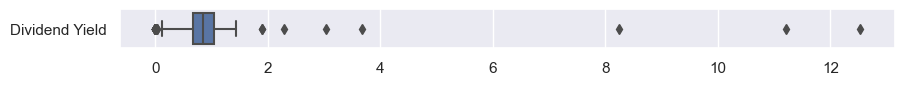

In [1056]:
sns.set(rc={"figure.figsize":(10, 0.5)})
sns.boxplot(data=df[["Dividend Yield"]], orient="h")

<AxesSubplot: >

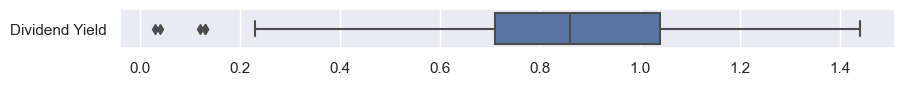

In [1057]:
df.drop(df.loc[df['Dividend Yield']>=1.8].index, inplace=True)
df.drop(df.loc[df['Dividend Yield']<=0.02].index, inplace=True)
sns.set(rc={"figure.figsize":(10, 0.5)})
sns.boxplot(data=df[["Dividend Yield"]], orient="h")

VPA

<AxesSubplot: >

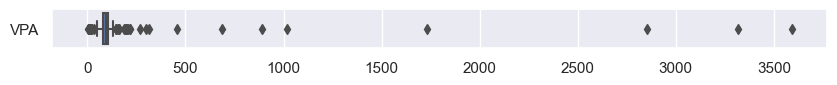

In [1058]:
sns.set(rc={"figure.figsize":(10, 0.5)})
sns.boxplot(data=df[["VPA"]], orient="h")

<AxesSubplot: >

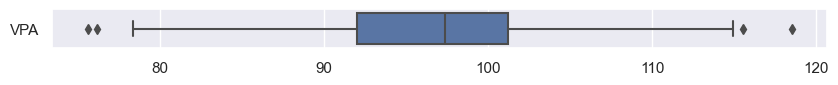

In [1059]:
df.drop(df.loc[df['VPA']>=120].index, inplace=True)
df.drop(df.loc[df['VPA']<=75].index, inplace=True)
sns.set(rc={"figure.figsize":(10, 0.5)})
sns.boxplot(data=df[["VPA"]], orient="h")

P/VPA

<AxesSubplot: >

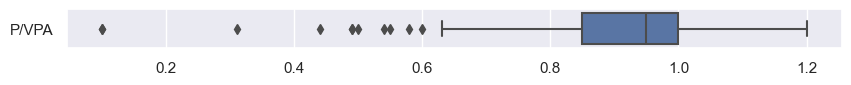

In [1060]:
sns.set(rc={"figure.figsize":(10, 0.5)})
sns.boxplot(data=df[["P/VPA"]], orient="h")

<AxesSubplot: >

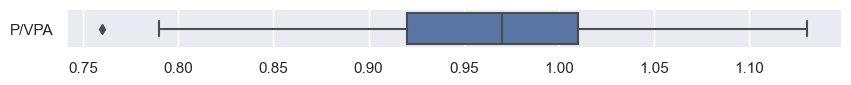

In [1061]:
df.drop(df.loc[df['P/VPA']>=1.2].index, inplace=True)
df.drop(df.loc[df['P/VPA']<=0.75].index, inplace=True)
sns.set(rc={"figure.figsize":(10, 0.5)})
sns.boxplot(data=df[["P/VPA"]], orient="h")

Preço Atual

<AxesSubplot: >

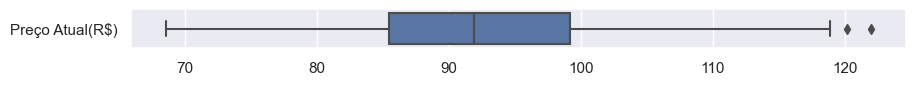

In [1062]:
sns.set(rc={"figure.figsize":(10, 0.5)})
sns.boxplot(data=df[["Preço Atual(R$)"]], orient="h")

<AxesSubplot: >

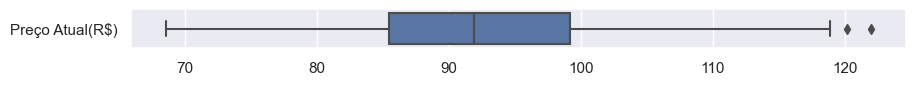

In [1063]:
df.drop(df.loc[df['Preço Atual(R$)']>=160.00].index, inplace=True)
sns.set(rc={"figure.figsize":(10, 0.5)})
sns.boxplot(data=df[["Preço Atual(R$)"]], orient="h")

In [1064]:
df.shape

(127, 28)

In [1065]:
num_estudos = df.shape[0]
print(f"O estudo segue com {num_estudos} fundos.")

O estudo segue com 127 fundos.


In [1066]:
df

,Fundos,Tipo,Setor,Preço Atual(R$),Liquidez Diária(R$),P/VP,Ultimo Dividendo(R$),Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,...,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Vacancia Física,Vacancia Financeira,Quantidade de Ativos
1,ABCP11,TIJOLO,SHOPPINGS,72.09,50202.72,0.79,0.50,0.70,2.12,4.39,...,4.321627e+08,91.82,0.79,0.65,-0.18,0.47,7.12,None,None,1
2,AFHI11,PAPÉIS,PAPÉIS,97.50,1634688.55,1.02,1.10,1.11,3.38,6.80,...,2.903880e+08,94.82,1.03,1.01,-0.94,0.06,5.00,None,None,0
6,ALZM11,FOF,FUNDO DE FUNDOS,92.50,86280.90,1.00,0.85,0.92,2.74,5.85,...,6.390786e+07,100.50,0.92,1.07,2.33,3.43,8.23,None,None,0
7,ALZR11,HIBRIDO,MISTO,116.71,2781310.10,1.10,0.83,0.70,2.14,4.31,...,1.051986e+09,106.94,1.09,0.68,-0.03,0.65,7.26,None,None,13
14,BARI11,PAPÉIS,PAPÉIS,87.05,687826.45,0.89,0.90,1.01,3.21,6.57,...,4.500284e+08,99.63,0.87,0.90,-0.70,0.19,8.18,None,None,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,VVPR11,HIBRIDO,MISTO,101.50,1249061.55,1.04,0.89,0.89,2.47,4.88,...,2.260322e+08,103.41,0.98,0.74,0.02,0.76,1.53,None,None,6
376,XPCI11,PAPÉIS,PAPÉIS,87.02,2366121.69,0.92,1.00,1.15,3.29,6.78,...,8.257475e+08,93.63,0.93,0.64,-1.97,-1.34,10.11,None,None,0
380,XPIN11,TIJOLO,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,83.60,421503.52,0.81,0.65,0.78,2.38,5.06,...,7.301584e+08,103.81,0.81,0.63,-1.37,-0.75,0.75,None,None,98
381,XPLG11,TIJOLO,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,114.86,3133485.24,1.02,0.78,0.68,2.08,4.39,...,3.064092e+09,114.49,1.00,0.65,0.19,0.84,11.47,None,None,19


___

Analize dos fundos(melhorar descricao)

In [1067]:
df.head(5)

,Fundos,Tipo,Setor,Preço Atual(R$),Liquidez Diária(R$),P/VP,Ultimo Dividendo(R$),Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,...,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Vacancia Física,Vacancia Financeira,Quantidade de Ativos
1,ABCP11,TIJOLO,SHOPPINGS,72.09,50202.72,0.79,0.50,0.70,2.12,4.39,...,4.321627e+08,91.82,0.79,0.65,-0.18,0.47,7.12,None,None,1
2,AFHI11,PAPÉIS,PAPÉIS,97.50,1634688.55,1.02,1.10,1.11,3.38,6.80,...,2.903880e+08,94.82,1.03,1.01,-0.94,0.06,5.00,None,None,0
6,ALZM11,FOF,FUNDO DE FUNDOS,92.50,86280.90,1.00,0.85,0.92,2.74,5.85,...,6.390786e+07,100.50,0.92,1.07,2.33,3.43,8.23,None,None,0
7,ALZR11,HIBRIDO,MISTO,116.71,2781310.10,1.10,0.83,0.70,2.14,4.31,...,1.051986e+09,106.94,1.09,0.68,-0.03,0.65,7.26,None,None,13
14,BARI11,PAPÉIS,PAPÉIS,87.05,687826.45,0.89,0.90,1.01,3.21,6.57,...,4.500284e+08,99.63,0.87,0.90,-0.70,0.19,8.18,None,None,0


In [1068]:
df.sample(5)

,Fundos,Tipo,Setor,Preço Atual(R$),Liquidez Diária(R$),P/VP,Ultimo Dividendo(R$),Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,...,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Vacancia Física,Vacancia Financeira,Quantidade de Ativos
252,PLCA11,FIAGRO,INDEFINIDO,90.20,26450.10,0.88,1.13,1.23,3.77,7.44,...,5.290857e+07,94.99,0.95,1.18,0.00,0.00,0.00,None,None,0
135,HABT11,PAPÉIS,PAPÉIS,95.80,1284397.76,0.96,1.20,1.25,3.89,8.21,...,8.101703e+08,99.80,0.96,0.92,0.14,1.06,15.75,None,None,0
200,LASC11,TIJOLO,SHOPPINGS,101.89,818213.46,0.99,0.63,0.62,1.22,6.03,...,3.000340e+08,109.68,0.93,0.74,-0.24,0.50,2.30,None,None,2
288,RBVA11,TIJOLO,VAREJO,109.60,716449.41,1.01,1.00,0.91,2.81,5.89,...,1.256243e+09,103.19,1.06,1.04,0.12,1.16,11.23,None,None,77
55,BTLG11,TIJOLO,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,103.05,7318143.97,1.07,0.76,0.73,2.21,4.55,...,2.069086e+09,99.19,1.04,0.75,0.09,0.84,4.82,None,None,20


In [1069]:
df.tail(5)

,Fundos,Tipo,Setor,Preço Atual(R$),Liquidez Diária(R$),P/VP,Ultimo Dividendo(R$),Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,...,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Vacancia Física,Vacancia Financeira,Quantidade de Ativos
370,VVPR11,HIBRIDO,MISTO,101.50,1249061.55,1.04,0.89,0.89,2.47,4.88,...,2.260322e+08,103.41,0.98,0.74,0.02,0.76,1.53,None,None,6
376,XPCI11,PAPÉIS,PAPÉIS,87.02,2366121.69,0.92,1.00,1.15,3.29,6.78,...,8.257475e+08,93.63,0.93,0.64,-1.97,-1.34,10.11,None,None,0
380,XPIN11,TIJOLO,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,83.60,421503.52,0.81,0.65,0.78,2.38,5.06,...,7.301584e+08,103.81,0.81,0.63,-1.37,-0.75,0.75,None,None,98
381,XPLG11,TIJOLO,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,114.86,3133485.24,1.02,0.78,0.68,2.08,4.39,...,3.064092e+09,114.49,1.00,0.65,0.19,0.84,11.47,None,None,19
382,XPML11,TIJOLO,SHOPPINGS,109.57,8757252.10,1.12,0.83,0.80,2.37,4.76,...,2.472954e+09,101.27,1.08,0.76,-0.66,0.10,6.56,None,None,12


In [1070]:
df["Tipo"].value_counts()

PAPÉIS                      47
TIJOLO                      37
FOF                         21
FIAGRO                       9
HIBRIDO                      6
INDEFINIDO                   4
FUNDO DE DESENVOLVIMENTO     3
Name: Tipo, dtype: int64

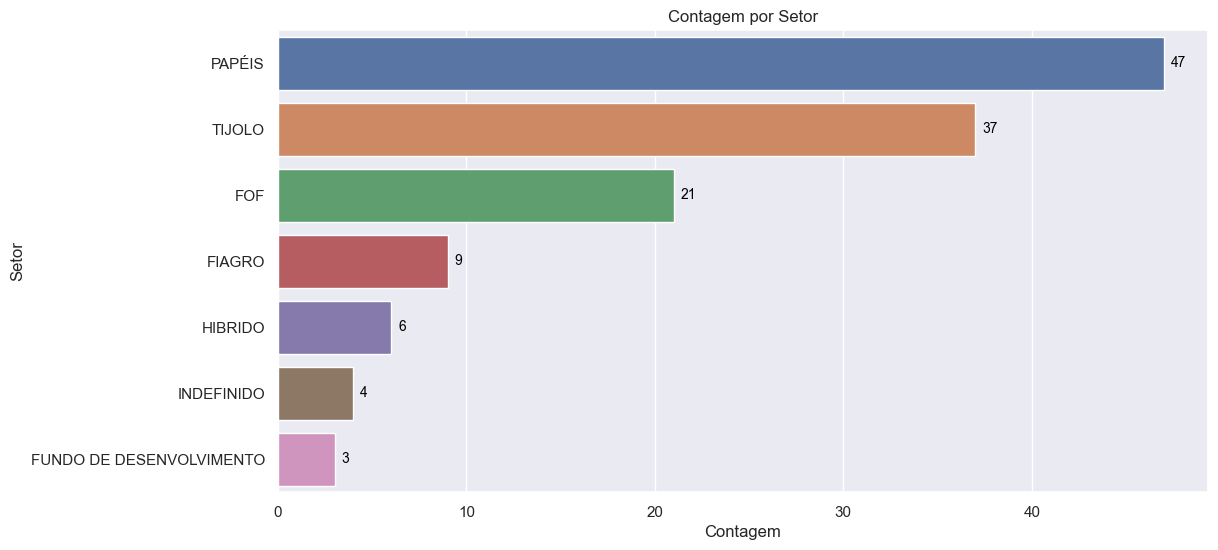

In [1071]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(y='Tipo', data=df, order=df['Tipo'].value_counts().index)

for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=10, color='black', xytext=(5, 0),
                textcoords='offset points')

plt.xlabel('Contagem')
plt.ylabel('Setor')
plt.title('Contagem por Setor')
plt.show()


os mais pagadores por tipo, os maiores dividendos, maior pagador, menor pagador


RENTABILIDADE DOS ULTIMOS 12 MESES

plot para ver outliers de preço por tipo de fiis

___

Geral

In [1072]:
df_teste = df[(df['P/VPA'] <= 1)]
df_teste2 = df_teste[(df['Dividend Yield'] >= 0.8)]
df_teste2 = df_teste2.sort_values(by='Ultimo Dividendo(R$)', ascending=False)
pd.Dataframe=df_teste2
df_teste2.head(10)


C:\Users\dougl\AppData\Local\Temp\ipykernel_19540\1765953071.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_teste2 = df_teste[(df['Dividend Yield'] >= 0.8)]


,Fundos,Tipo,Setor,Preço Atual(R$),Liquidez Diária(R$),P/VP,Ultimo Dividendo(R$),Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,...,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Vacancia Física,Vacancia Financeira,Quantidade de Ativos
74,CPTR11,FIAGRO,INDEFINIDO,97.95,1937873.45,0.97,1.30,1.34,4.15,8.51,...,4.070996e+08,98.38,1.00,1.37,-0.31,1.06,2.50,None,None,0
180,JPPA11,PAPÉIS,PAPÉIS,99.04,308392.62,0.99,1.25,1.25,3.97,8.21,...,8.972954e+07,99.04,1.00,1.41,-0.73,0.67,11.76,None,None,0
290,RCFF11,FOF,FUNDO DE FUNDOS,85.00,43597.00,0.91,1.23,1.32,1.32,4.19,...,3.029723e+07,94.05,0.90,1.86,-0.06,1.80,1.80,None,None,0
244,OUJP11,PAPÉIS,PAPÉIS,99.99,569566.55,1.01,1.20,1.18,3.66,7.60,...,3.210059e+08,99.94,1.00,1.20,-1.18,0.01,13.55,None,None,0
135,HABT11,PAPÉIS,PAPÉIS,95.80,1284397.76,0.96,1.20,1.25,3.89,8.21,...,8.101703e+08,99.80,0.96,0.92,0.14,1.06,15.75,None,None,0
310,RZAK11,PAPÉIS,PAPÉIS,91.70,5378524.52,0.98,1.20,1.26,3.97,7.68,...,8.200132e+08,92.64,0.99,1.62,-0.41,1.20,7.90,None,None,0
272,RBHY11,PAPÉIS,PAPÉIS,93.71,93558.59,1.00,1.20,1.27,3.83,7.70,...,1.774237e+08,94.54,0.99,1.27,-0.77,0.49,12.61,None,None,0
346,VCRA11,FIAGRO,INDEFINIDO,95.70,532353.31,0.98,1.19,1.23,3.82,7.38,...,4.713737e+08,102.61,0.93,1.16,0.22,1.38,2.87,None,None,0
193,KNCR11,PAPÉIS,PAPÉIS,98.84,11814640.10,0.98,1.15,1.16,3.64,6.93,...,5.759279e+09,100.66,0.98,1.09,-0.02,1.08,11.76,None,None,0
344,URPR11,PAPÉIS,PAPÉIS,96.60,2211786.97,0.96,1.13,1.12,3.85,8.00,...,1.169228e+09,99.33,0.97,1.12,-1.74,-0.64,22.93,None,None,0


In [1073]:
novo_df = df_teste2[['Setor','Fundos', 'Ultimo Dividendo(R$)', 'P/VPA', 'Preço Atual(R$)']]

In [1074]:
novo_df = novo_df.sort_values(by='Ultimo Dividendo(R$)', ascending=False)

In [1075]:
novo_df

,Setor,Fundos,Ultimo Dividendo(R$),P/VPA,Preço Atual(R$)
74,INDEFINIDO,CPTR11,1.30,1.00,97.95
180,PAPÉIS,JPPA11,1.25,1.00,99.04
290,FUNDO DE FUNDOS,RCFF11,1.23,0.90,85.00
135,PAPÉIS,HABT11,1.20,0.96,95.80
310,PAPÉIS,RZAK11,1.20,0.99,91.70
...,...,...,...,...,...
362,PAPÉIS,VOTS11,0.70,0.92,86.21
175,FUNDO DE FUNDOS,ITIT11,0.66,0.99,78.50
229,FUNDO DE FUNDOS,MORE11,0.62,0.92,76.22
295,FUNDO DE FUNDOS,RECX11,0.60,0.88,68.60


In [1076]:
novo_df.groupby(['Setor'])['Ultimo Dividendo(R$)'].count().reset_index().sort_values(by='Ultimo Dividendo(R$)', ascending=False)

,Setor,Ultimo Dividendo(R$)
8,PAPÉIS,33
2,FUNDO DE FUNDOS,10
5,INDEFINIDO,8
7,MISTO,4
6,LAJES CORPORATIVAS,3
4,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,2
0,AGÊNCIAS DE BANCOS,1
1,FUNDO DE DESENVOLVIMENTO,1
3,HOTÉIS,1
9,SHOPPINGS,1


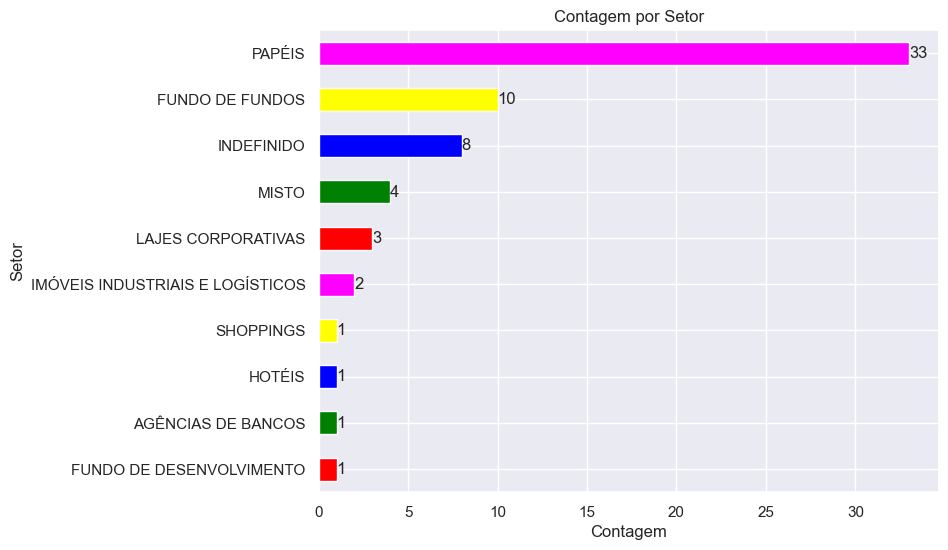

In [1077]:
contagem_setor = novo_df['Setor'].value_counts().sort_values(ascending=True)
cores = ['red', 'green', 'blue', 'yellow', 'magenta']
ax = contagem_setor.plot(kind='barh', figsize=(8, 6), color=cores)
plt.title('Contagem por Setor')
plt.xlabel('Contagem')
plt.ylabel('Setor')
for i, v in enumerate(contagem_setor):
    ax.text(v, i, str(v), ha='left', va='center')

plt.show()

In [1078]:
df_teste

,Fundos,Tipo,Setor,Preço Atual(R$),Liquidez Diária(R$),P/VP,Ultimo Dividendo(R$),Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,...,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Vacancia Física,Vacancia Financeira,Quantidade de Ativos
1,ABCP11,TIJOLO,SHOPPINGS,72.09,50202.72,0.79,0.50,0.70,2.12,4.39,...,4.321627e+08,91.82,0.79,0.65,-0.18,0.47,7.12,None,None,1
6,ALZM11,FOF,FUNDO DE FUNDOS,92.50,86280.90,1.00,0.85,0.92,2.74,5.85,...,6.390786e+07,100.50,0.92,1.07,2.33,3.43,8.23,None,None,0
14,BARI11,PAPÉIS,PAPÉIS,87.05,687826.45,0.89,0.90,1.01,3.21,6.57,...,4.500284e+08,99.63,0.87,0.90,-0.70,0.19,8.18,None,None,0
16,BBFO11,FOF,FUNDO DE FUNDOS,74.52,249966.17,0.92,0.70,0.92,2.87,6.15,...,3.290045e+08,82.36,0.90,0.73,-4.19,-3.49,4.75,None,None,0
17,BBGO11,FIAGRO,INDEFINIDO,90.98,421985.93,0.84,1.01,1.08,4.73,8.61,...,3.925504e+08,98.01,0.93,1.04,0.08,1.12,9.31,None,None,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,VTLT11,TIJOLO,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,98.19,212704.48,0.97,0.88,0.88,2.73,5.66,...,2.137423e+08,102.98,0.95,0.81,0.05,0.86,8.91,None,None,1
370,VVPR11,HIBRIDO,MISTO,101.50,1249061.55,1.04,0.89,0.89,2.47,4.88,...,2.260322e+08,103.41,0.98,0.74,0.02,0.76,1.53,None,None,6
376,XPCI11,PAPÉIS,PAPÉIS,87.02,2366121.69,0.92,1.00,1.15,3.29,6.78,...,8.257475e+08,93.63,0.93,0.64,-1.97,-1.34,10.11,None,None,0
380,XPIN11,TIJOLO,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,83.60,421503.52,0.81,0.65,0.78,2.38,5.06,...,7.301584e+08,103.81,0.81,0.63,-1.37,-0.75,0.75,None,None,98


In [1079]:
df_geral = df.sort_values(by='P/VPA')


In [1080]:
df_geral2 = df_geral.sort_values(by='Preço Atual(R$)', ascending=True)

In [1081]:
df_geral2

,Fundos,Tipo,Setor,Preço Atual(R$),Liquidez Diária(R$),P/VP,Ultimo Dividendo(R$),Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,...,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Vacancia Física,Vacancia Financeira,Quantidade de Ativos
295,RECX11,FOF,FUNDO DE FUNDOS,68.60,7760.72,0.89,0.60,0.85,2.70,5.90,...,1.677918e+07,78.36,0.88,0.77,-3.80,-3.06,-5.68,None,None,0
249,PATC11,FUNDO DE DESENVOLVIMENTO,FUNDO DE DESENVOLVIMENTO,69.20,508437.79,0.92,0.34,0.49,3.24,5.98,...,2.619905e+08,79.10,0.87,0.35,-7.17,-6.84,-4.71,None,None,7
224,MGHT11,TIJOLO,HOTÉIS,69.24,123141.90,0.81,0.80,1.18,3.83,7.83,...,1.145608e+08,85.61,0.81,0.76,-0.45,0.30,-6.08,None,None,1
1,ABCP11,TIJOLO,SHOPPINGS,72.09,50202.72,0.79,0.50,0.70,2.12,4.39,...,4.321627e+08,91.82,0.79,0.65,-0.18,0.47,7.12,None,None,1
250,PATL11,TIJOLO,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,74.05,713030.72,0.75,0.60,0.82,2.44,5.26,...,4.915601e+08,98.01,0.76,0.59,-0.10,0.49,6.74,None,None,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,ALZR11,HIBRIDO,MISTO,116.71,2781310.10,1.10,0.83,0.70,2.14,4.31,...,1.051986e+09,106.94,1.09,0.68,-0.03,0.65,7.26,None,None,13
108,FCFL11,TIJOLO,EDUCACIONAL,118.00,169552.41,1.01,0.79,0.69,2.17,4.46,...,4.037461e+08,104.80,1.13,0.73,0.00,0.73,5.64,None,None,1
211,LVBI11,TIJOLO,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,118.89,2028517.41,1.03,0.79,0.67,2.05,4.34,...,1.363471e+09,115.51,1.03,0.65,-0.03,0.62,4.47,None,None,8
357,VISC11,TIJOLO,SHOPPINGS,120.15,4065472.14,1.05,0.85,0.71,2.11,4.45,...,2.142724e+09,114.93,1.05,0.66,-0.04,0.62,5.92,None,None,20


___

Setor Papéis

In [1082]:
df_papeis = df[df['Setor']=='PAPÉIS']
df_papeis = df_papeis.sort_values(by='Ultimo Dividendo(R$)', ascending=False)
df_papeis.head(10)

,Fundos,Tipo,Setor,Preço Atual(R$),Liquidez Diária(R$),P/VP,Ultimo Dividendo(R$),Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,...,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Vacancia Física,Vacancia Financeira,Quantidade de Ativos
61,CACR11,PAPÉIS,PAPÉIS,105.00,677715.52,1.01,1.42,1.31,4.26,8.41,...,1.878970e+08,103.41,1.02,1.37,-0.05,1.32,37.55,None,None,0
219,MCHY11,PAPÉIS,PAPÉIS,110.89,30430.62,1.08,1.40,1.25,3.75,7.55,...,3.653825e+08,99.69,1.11,3.41,-3.72,-0.43,9.03,None,None,0
180,JPPA11,PAPÉIS,PAPÉIS,99.04,308392.62,0.99,1.25,1.25,3.97,8.21,...,8.972954e+07,99.04,1.00,1.41,-0.73,0.67,11.76,None,None,0
272,RBHY11,PAPÉIS,PAPÉIS,93.71,93558.59,1.00,1.20,1.27,3.83,7.70,...,1.774237e+08,94.54,0.99,1.27,-0.77,0.49,12.61,None,None,0
244,OUJP11,PAPÉIS,PAPÉIS,99.99,569566.55,1.01,1.20,1.18,3.66,7.60,...,3.210059e+08,99.94,1.00,1.20,-1.18,0.01,13.55,None,None,0
310,RZAK11,PAPÉIS,PAPÉIS,91.70,5378524.52,0.98,1.20,1.26,3.97,7.68,...,8.200132e+08,92.64,0.99,1.62,-0.41,1.20,7.90,None,None,0
286,RBRY11,PAPÉIS,PAPÉIS,100.78,1468708.90,1.02,1.20,1.18,3.70,7.57,...,5.549563e+08,99.30,1.01,1.01,-0.58,0.42,3.41,None,None,0
135,HABT11,PAPÉIS,PAPÉIS,95.80,1284397.76,0.96,1.20,1.25,3.89,8.21,...,8.101703e+08,99.80,0.96,0.92,0.14,1.06,15.75,None,None,0
193,KNCR11,PAPÉIS,PAPÉIS,98.84,11814640.10,0.98,1.15,1.16,3.64,6.93,...,5.759279e+09,100.66,0.98,1.09,-0.02,1.08,11.76,None,None,0
344,URPR11,PAPÉIS,PAPÉIS,96.60,2211786.97,0.96,1.13,1.12,3.85,8.00,...,1.169228e+09,99.33,0.97,1.12,-1.74,-0.64,22.93,None,None,0


//*[@id="widget-container"]/div[2]/div[3]/div[2]/div[1]/div/table/tr[1]/td[2]/div/canvas[2]

Setor Lajes Corporativas

___


Setor: Fundo de Desenvolvimento

In [1083]:
df_f_desenvolvimento = df[df['Setor']=='FUNDO DE DESENVOLVIMENTO']
df_f_desenvolvimento = df_f_desenvolvimento.sort_values(by='Ultimo Dividendo(R$)', ascending=False)
df_f_desenvolvimento.head(10)

,Fundos,Tipo,Setor,Preço Atual(R$),Liquidez Diária(R$),P/VP,Ultimo Dividendo(R$),Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,...,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Vacancia Física,Vacancia Financeira,Quantidade de Ativos
336,TGAR11,FUNDO DE DESENVOLVIMENTO,FUNDO DE DESENVOLVIMENTO,121.93,4404321.10,1.02,1.40,1.14,3.39,6.93,...,1.647017e+09,114.63,1.06,1.31,-2.00,-0.72,-0.98,None,None,8
221,MFII11,FUNDO DE DESENVOLVIMENTO,FUNDO DE DESENVOLVIMENTO,94.50,491172.93,0.93,1.07,1.12,3.46,7.06,...,4.240530e+08,99.09,0.95,1.12,-1.83,-0.73,2.53,None,None,8
249,PATC11,FUNDO DE DESENVOLVIMENTO,FUNDO DE DESENVOLVIMENTO,69.20,508437.79,0.92,0.34,0.49,3.24,5.98,...,2.619905e+08,79.10,0.87,0.35,-7.17,-6.84,-4.71,None,None,7


In [1084]:
fundo_maior_dividendo = df_f_desenvolvimento.nlargest(1, 'Ultimo Dividendo(R$)')
ticker_f_desenvolvimento = fundo_maior_dividendo['Fundos'].values[0]
ticker_f_desenvolvimento_completo = ticker_f_desenvolvimento + '.SA'


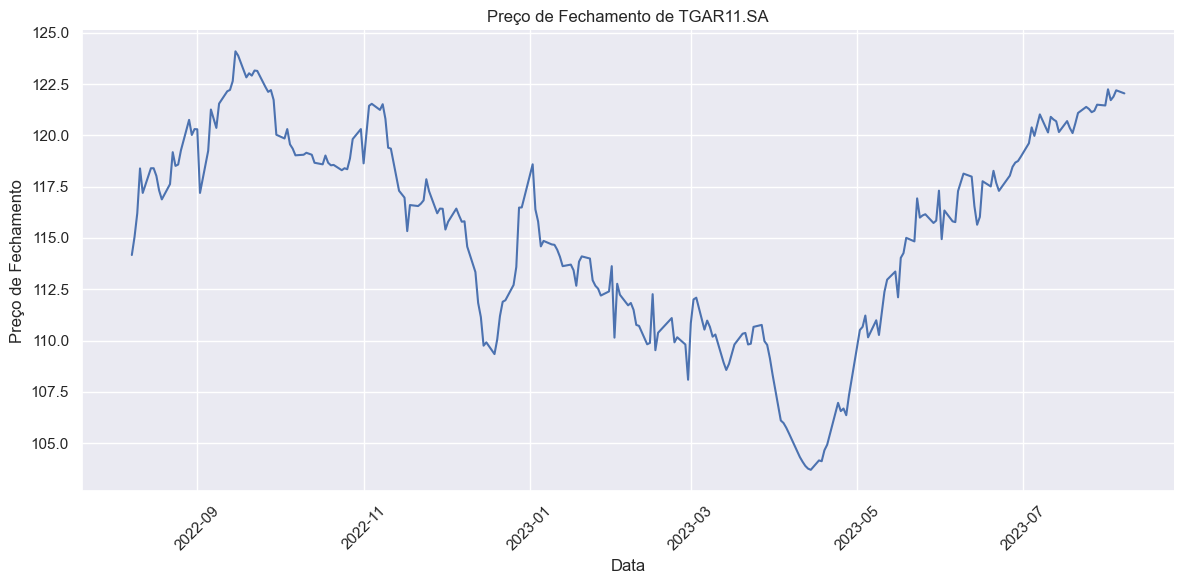

In [1085]:
sns.set_theme(style="darkgrid")
ticker = ticker_f_desenvolvimento_completo
fund = yf.Ticker(ticker)
start_date = "2022-08-08"
end_date = "2023-08-08"
historical_data = fund.history(start=start_date, end=end_date)

# Crie um gráfico de linha mais bonito com os dados de preço de fechamento
plt.figure(figsize=(12, 6))
plt.plot(historical_data.index, historical_data['Close'], marker='', linestyle='-', color='b')
plt.title(f"Preço de Fechamento de {ticker}")
plt.xlabel("Data")
plt.ylabel("Preço de Fechamento")
plt.xticks(rotation=45)  # Rotação dos rótulos do eixo x para melhor legibilidade
sns.despine()  # Remover as bordas do gráfico
plt.tight_layout()  # Ajustar o layout
plt.show()

___

Setor: Indefinido

In [1086]:
df_f_indefinido = df[df['Setor']=='INDEFINIDO']
df_f_indefinido = df_f_indefinido.sort_values(by='Ultimo Dividendo(R$)', ascending=False)
df_f_indefinido.head(10)

,Fundos,Tipo,Setor,Preço Atual(R$),Liquidez Diária(R$),P/VP,Ultimo Dividendo(R$),Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,...,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Vacancia Física,Vacancia Financeira,Quantidade de Ativos
97,EGAF11,FIAGRO,INDEFINIDO,98.84,786296.00,1.03,1.40,1.40,4.24,8.12,...,1.095135e+08,98.07,1.01,1.22,0.00,0.00,0.00,None,None,0
74,CPTR11,FIAGRO,INDEFINIDO,97.95,1937873.45,0.97,1.30,1.34,4.15,8.51,...,4.070996e+08,98.38,1.00,1.37,-0.31,1.06,2.50,None,None,0
179,JGPX11,FIAGRO,INDEFINIDO,98.98,255021.52,1.00,1.28,1.28,4.00,7.82,...,8.178438e+07,96.43,1.03,1.21,0.48,1.70,12.76,None,None,0
76,CRAA11,FIAGRO,INDEFINIDO,102.00,232181.45,1.01,1.25,1.21,4.08,7.18,...,5.018725e+07,101.42,1.01,1.48,0.00,0.00,0.00,None,None,0
346,VCRA11,FIAGRO,INDEFINIDO,95.70,532353.31,0.98,1.19,1.23,3.82,7.38,...,4.713737e+08,102.61,0.93,1.16,0.22,1.38,2.87,None,None,0
252,PLCA11,FIAGRO,INDEFINIDO,90.20,26450.10,0.88,1.13,1.23,3.77,7.44,...,5.290857e+07,94.99,0.95,1.18,0.00,0.00,0.00,None,None,0
192,KNCA11,FIAGRO,INDEFINIDO,106.82,2348676.38,1.05,1.11,1.04,3.55,6.95,...,1.441823e+09,102.26,1.04,1.11,0.07,1.18,12.58,None,None,0
126,GCRA11,FIAGRO,INDEFINIDO,90.18,521985.14,0.95,1.10,1.20,3.64,7.66,...,1.716086e+08,98.01,0.92,1.31,0.01,1.32,14.22,None,None,0
17,BBGO11,FIAGRO,INDEFINIDO,90.98,421985.93,0.84,1.01,1.08,4.73,8.61,...,3.925504e+08,98.01,0.93,1.04,0.08,1.12,9.31,None,None,0
185,KCRE11,INDEFINIDO,INDEFINIDO,97.46,397152.97,0.93,0.90,0.92,3.56,7.10,...,3.760046e+08,98.96,0.98,0.52,-1.96,-1.46,1.56,None,None,0


In [1087]:
indefinido_maior_dividendo = df_f_indefinido.nlargest(1, 'Ultimo Dividendo(R$)')
ticker_f_indefinido = indefinido_maior_dividendo['Fundos'].values[0]
ticker_f_indefinido_completo = ticker_f_indefinido + '.SA'

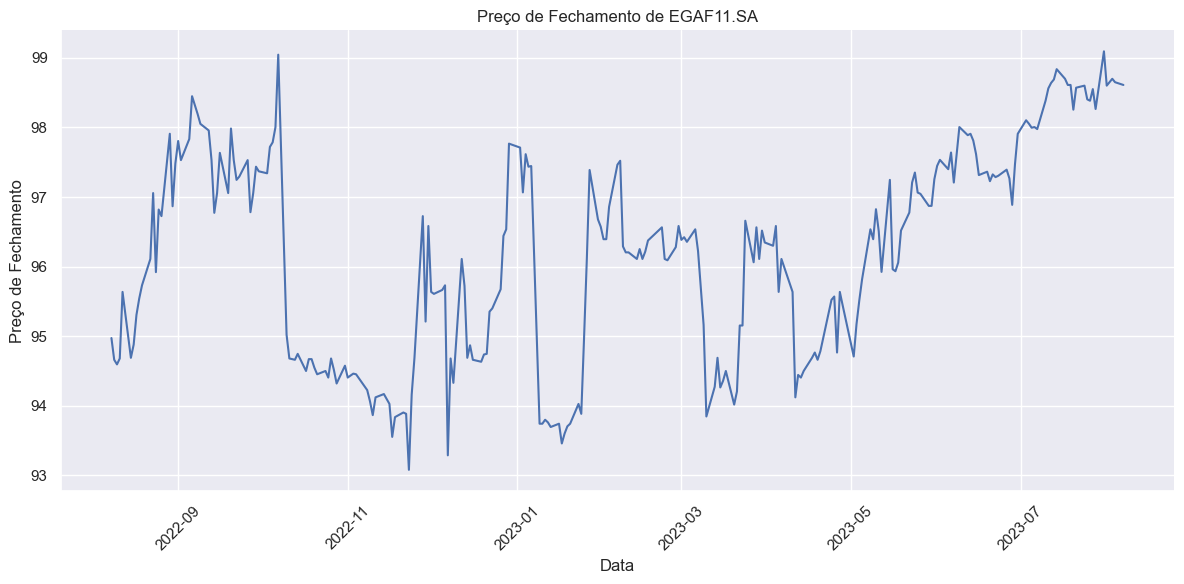

In [1088]:
sns.set_theme(style="darkgrid")
ticker = ticker_f_indefinido_completo
fund = yf.Ticker(ticker)
start_date = "2022-08-08"
end_date = "2023-08-08"
historical_data = fund.history(start=start_date, end=end_date)

# Crie um gráfico de linha mais bonito com os dados de preço de fechamento
plt.figure(figsize=(12, 6))
plt.plot(historical_data.index, historical_data['Close'], marker='', linestyle='-', color='b')
plt.title(f"Preço de Fechamento de {ticker}")
plt.xlabel("Data")
plt.ylabel("Preço de Fechamento")
plt.xticks(rotation=45)  # Rotação dos rótulos do eixo x para melhor legibilidade
sns.despine()  # Remover as bordas do gráfico
plt.tight_layout()  # Ajustar o layout
plt.show()

___


In [962]:
# Filtrar as linhas onde o Tipo é "FUNDO DE DESENVOLVIMENTO"
fundos_desenvolvimento = df[df['Tipo'] == 'FUNDO DE DESENVOLVIMENTO']

# Ordenar os fundos por último dividendo em ordem decrescente e pegar o primeiro
fundo_maior_dividendo = fundos_desenvolvimento.nlargest(1, 'Ultimo Dividendo(R$)')

# Obter o valor da coluna 'Fundos' do fundo com o maior último dividendo
ticker_f_desenvolvimento = fundo_maior_dividendo['Fundos'].values[0]

# Adicionar o complemento '.SA'
ticker_f_desenvolvimento_completo = ticker_f_desenvolvimento + '.SA'

print(ticker_f_desenvolvimento_completo)


TGAR11.SA


TICKER = 
TICKER.SA

FAZER PERCORRER UMA LISTA E PLOTAR SOMENTE OS MELHORES

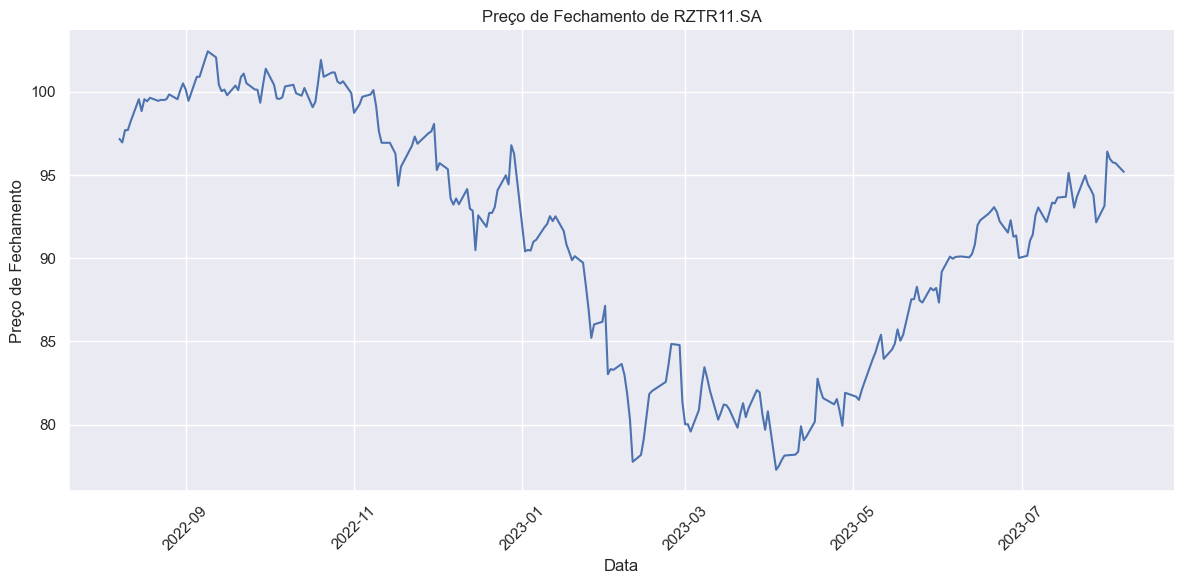

In [944]:
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

# Defina o estilo seaborn
sns.set_theme(style="darkgrid")

# Defina o ticker que você deseja obter (EGAF11.SA)
ticker = "RZTR11.SA"

# Crie um objeto Ticker usando yfinance
fund = yf.Ticker(ticker)

# Obtenha os dados históricos
start_date = "2022-08-08"
end_date = "2023-08-08"
historical_data = fund.history(start=start_date, end=end_date)

# Crie um gráfico de linha mais bonito com os dados de preço de fechamento
plt.figure(figsize=(12, 6))
plt.plot(historical_data.index, historical_data['Close'], marker='', linestyle='-', color='b')
plt.title(f"Preço de Fechamento de {ticker}")
plt.xlabel("Data")
plt.ylabel("Preço de Fechamento")
plt.xticks(rotation=45)  # Rotação dos rótulos do eixo x para melhor legibilidade
sns.despine()  # Remover as bordas do gráfico
plt.tight_layout()  # Ajustar o layout
plt.show()


no acima precisa colocar a cotacao nos ultimo ano, mes e 12 meses


https://www.clubefii.com.br/fiis/RZTR11

In [945]:
"C:\Users\dougl\OneDrive\Imagens\fiis teste de imagem.jpg"

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (2754070979.py, line 1)

precisa gerar um grafico adicional ,grafico de distribuicão dos ultimos 12 meses

___

Setor Fundos de Fundos

In [ ]:
df_f_fundos = df[df['Setor']=='FUNDO DE FUNDOS']
df_f_fundos = df_f_fundos.sort_values(by='Ultimo Dividendo', ascending=False)
df_f_fundos.head(10)

,Fundos,Setor,Preço Atual(R$),Liquidez Diária,P/VP,Ultimo Dividendo,Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,DY(12M) Acumulado,...,Rentab. Período,Rentab. Acumulada,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Quantidade de Ativos
186,KFOF11,FUNDO DE FUNDOS,97.48,1040574.43,0.96,1.00,1.08,2.91,5.69,10.81,...,9.71,25.52,4.423125e+08,92.06,1.06,0.78,-6.43,-5.70,6.11,0
180,JSAF11,FUNDO DE FUNDOS,97.45,638684.52,0.99,0.93,1.01,3.16,6.64,13.07,...,6.79,16.31,1.553302e+08,94.13,1.04,0.99,-4.06,-3.12,7.12,0
6,ALZM11,FUNDO DE FUNDOS,93.60,76188.64,1.02,0.85,0.92,2.74,5.85,13.02,...,0.69,13.77,6.390786e+07,100.50,0.93,1.07,2.33,3.43,8.23,0
22,BCIA11,FUNDO DE FUNDOS,106.00,804999.50,0.97,0.80,0.81,2.63,5.46,10.56,...,11.26,22.26,4.040178e+08,101.16,1.05,0.75,-5.66,-4.95,4.65,0
71,CPFF11,FUNDO DE FUNDOS,74.24,400125.95,0.89,0.75,1.00,2.32,4.24,9.40,...,14.58,20.74,2.111291e+08,78.73,0.94,0.76,-2.56,-1.82,6.71,0
306,RVBI11,FUNDO DE FUNDOS,85.25,211399.45,0.98,0.75,0.90,2.84,6.02,11.85,...,5.55,20.70,1.244864e+08,83.87,1.02,0.89,-2.88,-2.01,5.11,0
124,GCFF11,FUNDO DE FUNDOS,69.30,87694.83,0.89,0.75,1.15,3.26,6.29,11.93,...,-3.31,-5.59,2.793947e+07,82.69,0.84,0.87,-3.88,-3.05,-3.37,0
241,OUFF11,FUNDO DE FUNDOS,73.59,207722.79,0.94,0.72,1.00,3.15,6.55,13.06,...,8.24,20.23,1.411464e+08,76.15,0.97,0.92,-5.19,-4.32,5.61,3
93,DVFF11,FUNDO DE FUNDOS,85.41,47405.60,0.89,0.70,0.84,2.95,6.08,12.31,...,13.53,24.30,1.050454e+08,91.56,0.93,0.93,-4.01,-3.12,8.77,0
296,RFOF11,FUNDO DE FUNDOS,78.90,74570.38,0.95,0.70,0.92,2.90,5.99,11.72,...,7.50,15.72,8.919809e+07,80.55,0.98,0.91,-6.07,-5.22,1.08,0


Setor Imoveis Industriais e Logisticos

In [ ]:
df_iil = df[df['Setor']=='IMÓVEIS INDUSTRIAIS E LOGÍSTICOS']
df_iil = df_iil.sort_values(by='Ultimo Dividendo', ascending=False)
df_iil.head(10)

,Fundos,Setor,Preço Atual(R$),Liquidez Diária,P/VP,Ultimo Dividendo,Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,DY(12M) Acumulado,...,Rentab. Período,Rentab. Acumulada,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Quantidade de Ativos
85,CXTL11,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,315.00,27752.02,0.76,7.74,2.41,7.41,16.47,46.33,...,-3.35,-7.09,2.222059e+07,686.89,0.46,0.20,-1.86,-1.66,-1.49,1
111,FIIB11,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,507.87,225809.98,1.10,3.25,0.64,2.00,4.20,8.94,...,4.11,13.84,3.162176e+08,455.67,1.11,0.83,-0.10,0.74,7.62,9
101,EURO11,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,244.95,54851.02,0.75,1.90,0.78,2.34,4.71,9.51,...,5.23,11.63,1.248289e+08,312.91,0.78,0.61,0.01,0.62,6.68,7
148,HGLG11,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,163.65,9624864.33,1.06,1.50,0.90,2.27,4.32,8.93,...,6.05,6.13,3.608679e+09,147.80,1.11,0.74,0.37,1.11,9.68,20
112,FIIP11B,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,178.49,63326.43,0.86,1.44,0.87,2.66,5.49,10.65,...,9.16,18.89,1.883974e+08,186.18,0.96,0.73,-0.12,0.60,0.12,7
233,NEWL11,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,115.00,1373344.24,0.96,1.37,1.27,3.12,5.92,11.77,...,8.62,17.41,2.404972e+08,120.99,0.95,0.74,-0.31,0.44,13.74,3
128,GGRC11,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,121.26,1376880.93,1.06,1.05,0.85,2.64,5.46,10.44,...,6.32,12.11,9.261843e+08,124.59,0.97,0.82,-0.14,0.68,2.07,17
365,VTLT11,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,99.70,176351.12,0.99,0.88,0.88,2.80,5.73,10.98,...,10.81,13.21,2.137423e+08,102.98,0.97,0.81,0.05,0.86,8.91,1
43,BRCO11,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,121.25,4047778.33,1.01,0.87,0.75,2.05,3.99,7.92,...,3.93,24.16,1.774187e+09,121.55,1.00,0.58,2.01,2.60,8.31,11
314,SDIL11,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,96.50,1030917.86,1.03,0.83,0.86,2.61,5.36,10.37,...,2.55,7.49,6.131580e+08,98.33,0.98,0.83,-0.22,0.61,9.86,5


Setor Shoppings

In [ ]:
df_shop = df[df['Setor']=='SHOPPINGS']
df_shop= df_shop.sort_values(by='Ultimo Dividendo', ascending=False)
df_shop.head(10)

,Fundos,Setor,Preço Atual(R$),Liquidez Diária,P/VP,Ultimo Dividendo,Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,DY(12M) Acumulado,...,Rentab. Período,Rentab. Acumulada,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Quantidade de Ativos
257,PQDP11,SHOPPINGS,1995.00,124657.31,0.64,16.99,0.89,2.79,5.74,10.23,...,10.13,-6.16,7.663975e+08,3314.36,0.60,0.50,0.07,0.57,1.70,1
318,SHPH11,SHOPPINGS,799.00,137010.51,0.87,7.82,1.03,2.32,3.82,6.26,...,11.83,7.20,5.429901e+08,889.27,0.90,0.30,0.02,0.33,3.96,1
120,FVPQ11,SHOPPINGS,117.50,59605.40,0.61,1.80,1.65,3.33,6.10,9.52,...,8.51,15.10,5.392802e+08,198.60,0.59,0.28,-0.03,0.25,4.39,1
144,HGBS11,SHOPPINGS,226.25,1836236.24,1.01,1.45,0.67,2.10,4.40,8.46,...,5.61,19.74,2.223429e+09,216.98,1.04,0.65,-0.63,0.02,7.57,12
155,HPDP11,SHOPPINGS,82.98,7680.70,0.93,1.00,1.35,2.71,3.93,6.81,...,5.70,12.18,2.603080e+08,95.00,0.87,0.53,0.14,0.67,5.81,1
355,VISC11,SHOPPINGS,119.57,4520231.98,1.03,0.85,0.71,2.16,4.51,8.69,...,2.16,17.87,2.142724e+09,114.93,1.04,0.66,-0.04,0.62,5.92,20
380,XPML11,SHOPPINGS,105.80,7201790.26,1.06,0.83,0.80,2.37,4.76,9.32,...,0.75,10.64,2.472954e+09,101.27,1.04,0.76,-0.66,0.10,6.56,12
210,MALL11,SHOPPINGS,115.60,3264900.05,0.96,0.80,0.68,2.14,4.48,8.85,...,8.02,18.69,1.094884e+09,107.86,1.07,0.72,1.59,2.33,3.97,9
160,HSML11,SHOPPINGS,94.50,2986709.24,0.99,0.74,0.79,2.50,5.25,9.97,...,7.22,20.51,1.500704e+09,97.37,0.97,0.70,-0.19,0.51,4.26,7
363,VSHO11,SHOPPINGS,80.00,143830.95,0.78,0.72,0.92,2.99,6.09,10.71,...,13.02,21.92,2.113756e+08,98.91,0.81,0.69,0.13,0.82,3.57,3


Setor Misto

In [ ]:
df_misto = df[df['Setor']=='MISTO']
df_misto = df_misto.sort_values(by='Ultimo Dividendo', ascending=False)
df_misto.head(10)

,Fundos,Setor,Preço Atual(R$),Liquidez Diária,P/VP,Ultimo Dividendo,Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,DY(12M) Acumulado,...,Rentab. Período,Rentab. Acumulada,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Quantidade de Ativos
244,OURE11,MISTO,85.00,150179.73,0.92,1.00,1.19,3.69,7.66,15.40,...,4.44,9.87,9.920371e+07,92.02,0.92,1.14,-2.16,-1.04,11.12,4
196,KNRI11,MISTO,161.52,4385313.09,1.01,0.95,0.59,2.16,4.19,7.99,...,1.99,21.26,3.869616e+09,160.12,1.01,0.57,-0.09,0.47,7.86,19
368,VVPR11,MISTO,101.50,1249061.55,1.04,0.89,0.89,2.47,4.88,9.72,...,1.30,15.02,2.260322e+08,103.41,0.98,0.74,0.02,0.76,1.53,6
102,EVBI11,MISTO,97.00,130057.27,0.97,0.86,0.90,2.44,4.84,9.48,...,-0.04,7.81,2.123205e+08,100.21,0.97,0.75,-0.71,0.03,7.70,8
151,HGRU11,MISTO,129.00,4121729.86,1.07,0.85,0.64,2.38,4.55,9.48,...,0.75,14.25,2.273290e+09,120.00,1.08,0.68,-0.37,0.31,9.23,71
310,RZTR11,MISTO,95.14,2064309.23,0.97,0.85,0.90,2.77,5.79,12.41,...,3.52,0.59,1.074906e+09,97.31,0.98,1.28,0.00,1.29,10.37,15
7,ALZR11,MISTO,115.72,2970113.23,1.08,0.83,0.70,2.14,4.31,12.40,...,3.60,7.77,1.051986e+09,106.94,1.08,0.68,-0.03,0.65,7.26,13
316,SEQR11,MISTO,67.45,144692.68,0.72,0.71,1.11,3.37,6.82,12.99,...,4.16,11.20,1.503134e+08,96.27,0.70,0.70,0.22,0.93,7.92,4
312,SARE11,MISTO,59.28,1412854.68,0.64,0.50,0.82,2.63,5.82,11.26,...,-5.20,-4.05,8.736868e+08,94.59,0.63,0.68,-3.24,-2.59,2.42,3
181,JSRE11,MISTO,78.49,2994027.23,0.71,0.46,0.58,1.88,4.07,7.75,...,7.30,13.70,2.340997e+09,113.42,0.69,0.43,0.00,0.44,4.34,6


In [ ]:
df

,Fundos,Setor,Preço Atual(R$),Liquidez Diária,P/VP,Ultimo Dividendo,Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,DY(12M) Acumulado,...,Rentab. Período,Rentab. Acumulada,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Quantidade de Ativos
0,AAZQ11,INDEFINIDO,9.42,930832.31,1.01,0.10,1.03,3.83,8.26,8.26,...,1.98,7.77,2.306468e+08,9.60,0.98,1.46,0.00,0.00,0.00,0
1,ABCP11,SHOPPINGS,71.90,59727.24,0.78,0.50,0.70,2.15,4.44,8.96,...,3.54,1.08,4.321627e+08,91.82,0.78,0.65,-0.18,0.47,7.12,1
2,AFHI11,PAPÉIS,96.36,992736.38,1.00,1.10,1.11,3.38,6.80,13.31,...,1.92,8.99,2.903880e+08,94.82,1.02,1.01,-0.94,0.06,5.00,0
4,AIEC11,LAJES CORPORATIVAS,71.57,510684.48,0.75,0.78,1.10,3.59,6.31,13.04,...,11.26,8.62,4.564693e+08,102.56,0.70,0.73,0.24,0.98,9.40,2
6,ALZM11,FUNDO DE FUNDOS,93.60,76188.64,1.02,0.85,0.92,2.74,5.85,13.02,...,0.69,13.77,6.390786e+07,100.50,0.93,1.07,2.33,3.43,8.23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,XPIN11,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,81.04,469376.64,0.79,0.65,0.78,2.43,5.19,10.16,...,6.12,18.45,7.301584e+08,103.81,0.78,0.63,-1.37,-0.75,0.75,98
379,XPLG11,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,114.27,3722896.52,1.01,0.79,0.69,2.14,4.52,8.76,...,8.57,20.56,3.064092e+09,114.49,1.00,0.65,0.19,0.84,11.47,19
380,XPML11,SHOPPINGS,105.80,7201790.26,1.06,0.83,0.80,2.37,4.76,9.32,...,0.75,10.64,2.472954e+09,101.27,1.04,0.76,-0.66,0.10,6.56,12
381,XPPR11,LAJES CORPORATIVAS,22.42,272362.43,0.32,0.10,0.43,1.29,2.93,7.41,...,-1.71,-26.59,5.163569e+08,74.77,0.30,0.40,0.05,0.45,-3.65,5
